<a href="https://colab.research.google.com/github/MD2001/Pytorch_Bignnier/blob/main/01_pytoirch_WorkFlow_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##redoit agine
this part all use only the function for demonstarate the data but do all it aginen but cleaner way

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
#make digonistic device code
device="cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

#**1.Data**

In [3]:
# add the parameters for the data
wight=0.7
bais=0.3

# the range of data
start=0
end=1
step=0.02

data=torch.arange(start,end,step).unsqueeze(dim=1)
result = wight*data+bais

Spliter_data = (int)(0.8*len(data))

x_train,y_train=data[:Spliter_data],result[:Spliter_data]
x_test,y_test=data[Spliter_data:],result[Spliter_data:]

x_train[:5],y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [4]:
def plot_predictions(train_data=x_train,
                      train_labels=y_train,
                      test_data=x_test,
                      test_labels=y_test,
                      predictions=None):
    """
    Plot training data and test data along with predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.legend(prop={"size": 14})
    plt.show()

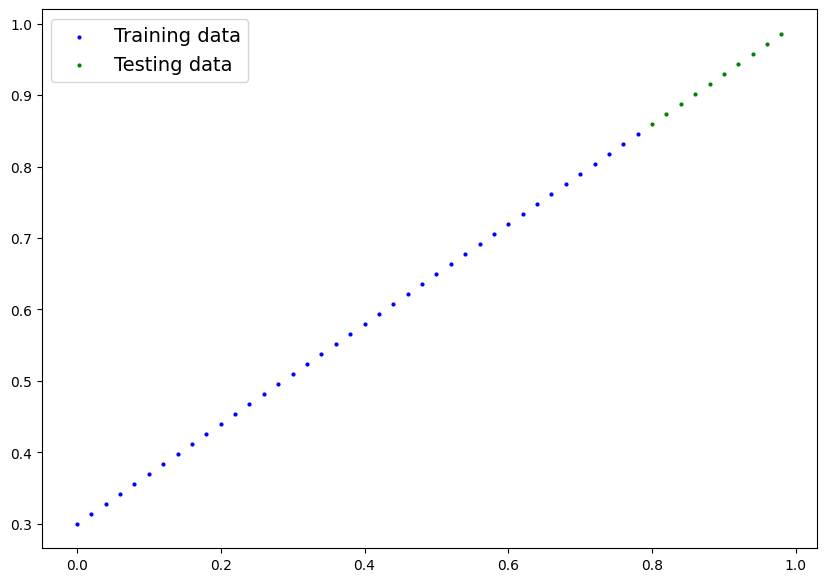

In [5]:
plot_predictions()

#2.Class

In [6]:
class LineraRegrationModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer=nn.Linear(in_features=1,out_features=1)

  def forward(self , x : torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1= LineraRegrationModelV2()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [7]:
model_1.eval()
with torch.inference_mode():
  y_pred=model_1(x_test)

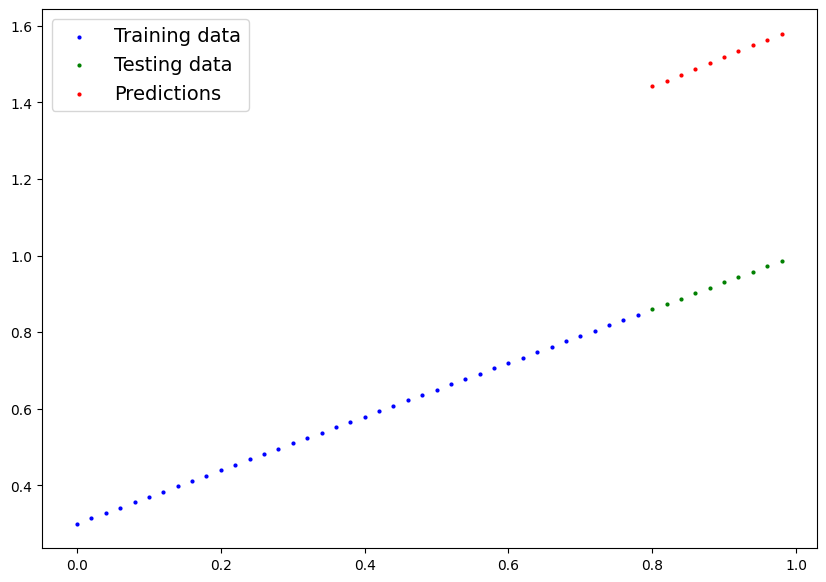

In [8]:
plot_predictions(predictions=y_pred)

#3.trainnig loop

In [9]:
#choising the loss function and optimizer

loss_func= nn.L1Loss()

optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.001)

loss_func,optimizer

(L1Loss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.001
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [10]:
# first we wnat send all the model and data to the memory of GPU to be traing ther
model_1.to(device)
x_train=x_train.to(device)
y_train=y_train.to(device)
x_test=x_test.to(device)
y_test=y_test.to(device)

## decieded number of epochs
torch.manual_seed(42)
epochs=600

for epoch in range(epochs):
  #set the parameters of model to be traine
  model_1.train()

  #get the prediction from model of trainging data

  y_prediction=model_1(x_train)

  #clculat the loss function (how far the prediction from real data)
  loss=loss_func(y_prediction,y_train)

  #optimizer gredint to zero(for computional peposes)
  optimizer.zero_grad()

  #clculate the grediant
  loss.backward()

  #deploy the grediant to the model (grediant deacinet)
  optimizer.step()

  #stop the taining config and start eval config
  model_1.eval()
  with torch.inference_mode():
    y_pred=model_1(x_test)

    loss_test=loss_func(y_pred,y_test)

  if epoch % 50 == 0:
    print(f"Epoch: {epoch} | loss: {loss} | test loss: {loss_test} ")



Epoch: 0 | loss: 0.5551779866218567 | test loss: 0.5861001014709473 
Epoch: 50 | loss: 0.49757376313209534 | test loss: 0.5187460780143738 
Epoch: 100 | loss: 0.4399694502353668 | test loss: 0.4513919949531555 
Epoch: 150 | loss: 0.38236525654792786 | test loss: 0.38403797149658203 
Epoch: 200 | loss: 0.3247610330581665 | test loss: 0.31668388843536377 
Epoch: 250 | loss: 0.26715680956840515 | test loss: 0.2493298500776291 
Epoch: 300 | loss: 0.209552600979805 | test loss: 0.18197579681873322 
Epoch: 350 | loss: 0.15194837749004364 | test loss: 0.11462175101041794 
Epoch: 400 | loss: 0.09434414654970169 | test loss: 0.04726768285036087 
Epoch: 450 | loss: 0.0378650426864624 | test loss: 0.0190771222114563 
Epoch: 500 | loss: 0.024156799539923668 | test loss: 0.044561710208654404 
Epoch: 550 | loss: 0.021657321602106094 | test loss: 0.04808937385678291 


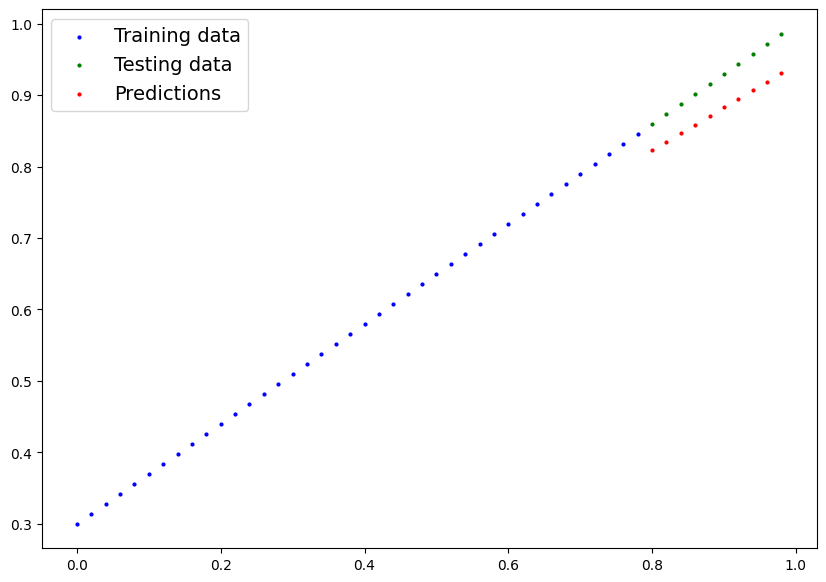

In [11]:
plot_predictions(predictions= y_pred.detach().cpu().numpy()
)